In [1]:

import numpy as np
import pandas as pd 
from collections import defaultdict
from pprint import pprint
import xgboost as xgb

In [2]:
df = pd.read_csv('cleaned_data/juneExtraMulticlass_500prods.csv')

In [3]:
df.head()

,Unnamed: 0,1000001696.0_prev,1000005980.0_prev,1000010393.0_prev,1000010403.0_prev,1000010411.0_prev,1000017733.0_prev,1000019395.0_prev,1000019459.0_prev,1000019571.0_prev,...,301026560.0_prev,500096181.0_prev,500097716.0_prev,500273977.0_prev,530000111.0_prev,Gender,State,customerID,target,transactionDate
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,251.0,2016-06-28
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,245.0,2016-06-28
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,244.0,2016-06-28
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,250.0,2016-06-28
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,265.0,2016-06-28


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('transactionDate', axis=1, inplace=True)
df.head()

,1000001696.0_prev,1000005980.0_prev,1000010393.0_prev,1000010403.0_prev,1000010411.0_prev,1000017733.0_prev,1000019395.0_prev,1000019459.0_prev,1000019571.0_prev,1000026628.0_prev,...,301025025.0_prev,301026560.0_prev,500096181.0_prev,500097716.0_prev,500273977.0_prev,530000111.0_prev,Gender,State,customerID,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,251.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,245.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,244.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,250.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,265.0


In [5]:
df['State'].value_counts()

MADHYA PRADESH    878
TAMIL NADU        426
KARNATAKA         365
no_state          331
JHARKHAND         302
PUNJAB            162
UTTAR PRADESH      40
MAHARASHTRA        19
CHHATTISGARH       15
ORISSA              8
DELHI               7
BIHAR               5
WEST BENGAL         5
ANDHRA PRADESH      4
RAJASTHAN           2
GUJARAT             1
Name: State, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Columns: 504 entries, 1000001696.0_prev to target
dtypes: float64(501), object(3)
memory usage: 9.9+ MB


In [7]:
prod_dict = {'_'}

#train = pd.get_dummies(train, columns=['product_code'], prefix=prod_dict)
df.columns=df.columns.str.replace('_5','')
df.columns=df.columns.str.replace('_4','')
df.columns=df.columns.str.replace('_3','')
df.columns=df.columns.str.replace('_2','')
df.columns=df.columns.str.replace('_1','')
df.columns=df.columns.str.replace('_prev','')
df.reset_index(drop=True).head()

,1000001696.0,1000005980.0,1000010393.0,1000010403.0,1000010411.0,1000017733.0,1000019395.0,1000019459.0,1000019571.0,1000026628.0,...,301025025.0,301026560.0,500096181.0,500097716.0,500273977.0,530000111.0,Gender,State,customerID,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,251.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,245.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,244.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,250.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,male,no_state,BBID_204735,265.0


In [8]:
df.drop(['Gender', 'State'], axis=1, inplace=True)

In [9]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
df_test = df_test.drop('target', axis=1)

In [11]:
df_test.head()

,1000001696.0,1000005980.0,1000010393.0,1000010403.0,1000010411.0,1000017733.0,1000019395.0,1000019459.0,1000019571.0,1000026628.0,...,301016667.0,301020890.0,301021066.0,301025025.0,301026560.0,500096181.0,500097716.0,500273977.0,530000111.0,customerID
2211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBID_211438301
2136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBID_211437457
1178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBID_20460667
1910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBID_211414947
649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBID_20442129


In [12]:
df_test.to_csv('test_file_new.csv', index=False)

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
def filter_data(df):
    df = df[df['State'] != 'no_state']
    df = df[df['Gender'] != 'no_gender']
    

In [ ]:
filter_data(df_train)

In [ ]:
df_train['State'].value_counts()

In [ ]:
dummy_col = ['Gender', 'State']
dummy_col_select = ['Gender', 'State']

In [ ]:
limit = int(0.05 * len(df_train.index))
use_dummy_col = {}

for col in dummy_col_select:
    trainlist = df_train[col].value_counts()
    use_dummy_col[col] = []
    for i,item in enumerate(trainlist):
        if item > limit:
            use_dummy_col[col].append(df_train[col].value_counts().index[i])

In [ ]:
def get_dummy(df):
    for col in dummy_col_select:
        for item in df[col].unique(): 
            if item not in use_dummy_col[col]:
                row_index = df[col] == item
                df.loc[row_index,col] = np.nan
    return pd.get_dummies(df, prefix=dummy_col, columns = dummy_col)

In [ ]:
df_train = get_dummy(df_train)
df_test = get_dummy(df_test)

In [ ]:
df_train.head()

In [15]:
df_train.reset_index(drop=True)

,1000001696.0,1000005980.0,1000010393.0,1000010403.0,1000010411.0,1000017733.0,1000019395.0,1000019459.0,1000019571.0,1000026628.0,1000026742.0,1000026751.0,1000032404.0,1000034055.0,1000034447.0,1000049681.0,1000052897.0,1000053898.0,1000058092.0,1000059431.0,1000067672.0,1000067678.0,1000071425.0,1000081523.0,1000088419.0,1000088467.0,1000088473.0,1000088477.0,1000088500.0,1000088540.0,1000092917.0,1000093979.0,1000096658.0,1000096680.0,1000110589.0,1000110676.0,1000116549.0,1000123958.0,1000129487.0,1000129541.0,1000158186.0,1000171548.0,1000209934.0,1000215039.0,1000269704.0,1000327894.0,1000334998.0,1000336252.0,1000349544.0,1000443242.0,1000450352.0,1000475623.0,1000486459.0,1000486566.0,1000503970.0,1000577194.0,1000591805.0,1000609658.0,1000615919.0,1000619267.0,1000619269.0,1000638372.0,1000652689.0,1000652761.0,1000694851.0,100105102.0,100105505.0,108000534.0,108000537.0,108000544.0,108000549.0,108000568.0,108000569.0,108000571.0,108000589.0,108000590.0,108000599.0,108000614.0,108000621.0,108000628.0,108000643.0,108000653.0,108000655.0,108000656.0,108000659.0,108000667.0,108000678.0,108000704.0,108000705.0,108000706.0,108000707.0,108000763.0,108000764.0,108000770.0,108000943.0,108000959.0,108000969.0,108000980.0,108000982.0,108001038.0,108001065.0,108001066.0,108001109.0,108001125.0,108001127.0,108001129.0,108001153.0,108001161.0,108001163.0,108001179.0,108001180.0,108001187.0,108001189.0,108001199.0,108003214.0,108003216.0,108003448.0,108003451.0,108003545.0,108003587.0,108003624.0,108003638.0,108003897.0,108004055.0,108004100.0,108004398.0,108004399.0,108004423.0,108004507.0,108004511.0,108004516.0,108004526.0,108004528.0,108004590.0,108004622.0,108004629.0,108004632.0,108004633.0,108004634.0,108004880.0,108004975.0,108004977.0,108005183.0,108005676.0,108005681.0,108005943.0,108007928.0,108008225.0,108008866.0,108010225.0,108014204.0,108014207.0,108014459.0,108015124.0,108015125.0,108015133.0,108015135.0,108015369.0,108015910.0,108016183.0,108016185.0,108016186.0,108016189.0,108016191.0,108016194.0,108017242.0,108017243.0,108017244.0,108017245.0,108017697.0,108018305.0,108018314.0,108018729.0,108018730.0,108018749.0,108018750.0,108018925.0,108020340.0,108020344.0,108020365.0,108020370.0,108020371.0,108020392.0,108020412.0,108020413.0,108020414.0,108020415.0,108020416.0,108020417.0,108020418.0,108020419.0,108020428.0,108020429.0,108020460.0,108020461.0,108020474.0,108020477.0,108020515.0,108020516.0,108020517.0,108020526.0,108020545.0,108020718.0,108022599.0,108026386.0,108026387.0,108026389.0,108026485.0,108026493.0,108026497.0,108026801.0,108027348.0,108027409.0,108027464.0,108028269.0,108028801.0,108029256.0,108029299.0,108029618.0,108029656.0,108029660.0,108030063.0,108030064.0,108030066.0,108030093.0,108030095.0,108030108.0,108030113.0,108032048.0,108032050.0,108032051.0,108032209.0,108034290.0,108034674.0,108035036.0,108035037.0,108035243.0,108035244.0,108037470.0,108037471.0,108037489.0,108037490.0,108037495.0,108037497.0,108037499.0,108037500.0,108037501.0,108037502.0,108037504.0,108037506.0,108037518.0,108037534.0,108037537.0,108037568.0,108037578.0,108037703.0,108037794.0,108037803.0,108037817.0,108042082.0,108043219.0,108043278.0,108100059.0,108100064.0,108100134.0,108100137.0,108100143.0,108100145.0,108100154.0,108100162.0,108100183.0,108100193.0,108100201.0,108100213.0,108100218.0,108100221.0,108100225.0,108100226.0,108100243.0,108100250.0,108100253.0,108100258.0,108100261.0,108100267.0,108100272.0,108100273.0,108100275.0,108100276.0,108100277.0,108100278.0,108100280.0,108100288.0,108100290.0,108100294.0,108100296.0,108100297.0,108100298.0,108100299.0,108100301.0,108100302.0,108100306.0,108100308.0,108100312.0,108100319.0,108100325.0,108100328.0,108100330.0,108100331.0,108100334.0,108100335.0,108100336.0,108100340.0,108100352.0,108100355.0,108100361.0,108100362.0,108100364.0,108100373.0,108100375.0,108100379.0,108100382.0,208001941.0,208002292.0,300027193.0,300028156.0,300035666.0,300043603.0,300054859.

In [16]:
def runXGB(train_X, train_y, colsample_bytree=0.9, max_depth= 6, eta=0.1, min_child_weight=2, subsample=0.9, num_rounds=150):
    param = {}
    param['objective'] = 'multi:softprob'
    param['seed'] = 0
    param['silent'] = 0
    param['eval_metric'] = "mlogloss"
    param['booster'] = 'gbtree'
    param['num_class'] = 500
    param['reg_lambda'] =100
    param['colsample_bytree'] = colsample_bytree
    param['max_depth'] = max_depth 
    param['eta'] = eta
    param['min_child_weight'] = min_child_weight
    param['subsample'] = subsample
    num_round = num_rounds

    progress = dict()
    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)
    watchlist  = [(xgtrain,'train')]
    model = xgb.train(plst, xgtrain, int(num_rounds/0.9), watchlist, evals_result=progress)
    return (model, progress)

In [17]:
cols = list(df_train.drop(['target','customerID'], 1).columns.values)

id_preds = defaultdict(list)
ids = df_test['customerID'].values

# predict model 
y_train = df_train['target']
x_train = df_train.drop(['target','customerID'], 1)
print('before xgb')    
(clf, progress) = runXGB(x_train, y_train)
print('after xgb')        
x_test = df_test[cols]
x_test.fillna(0,inplace=True)
        


before xgb
[0]	train-mlogloss:6.20479
[1]	train-mlogloss:6.19522
[2]	train-mlogloss:6.18564
[3]	train-mlogloss:6.17654
[4]	train-mlogloss:6.16729
[5]	train-mlogloss:6.15834
[6]	train-mlogloss:6.14962
[7]	train-mlogloss:6.14088
[8]	train-mlogloss:6.13192
[9]	train-mlogloss:6.12314
[10]	train-mlogloss:6.11468
[11]	train-mlogloss:6.10611
[12]	train-mlogloss:6.09783
[13]	train-mlogloss:6.08972
[14]	train-mlogloss:6.08175
[15]	train-mlogloss:6.07385
[16]	train-mlogloss:6.066
[17]	train-mlogloss:6.05811
[18]	train-mlogloss:6.05045
[19]	train-mlogloss:6.04287
[20]	train-mlogloss:6.03551
[21]	train-mlogloss:6.02829
[22]	train-mlogloss:6.02107
[23]	train-mlogloss:6.01407
[24]	train-mlogloss:6.00706
[25]	train-mlogloss:6.00036
[26]	train-mlogloss:5.99403
[27]	train-mlogloss:5.98756
[28]	train-mlogloss:5.98104
[29]	train-mlogloss:5.97492
[30]	train-mlogloss:5.96881
[31]	train-mlogloss:5.96265
[32]	train-mlogloss:5.95678
[33]	train-mlogloss:5.95105
[34]	train-mlogloss:5.94536
[35]	train-mlogloss:5

C:\Anaconda3\envs\aind-dog-copy\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [18]:
d_test = xgb.DMatrix(x_test)
p_test = clf.predict(d_test)
        
for id, p in zip(ids, p_test):
    id_preds[id] = list(p)

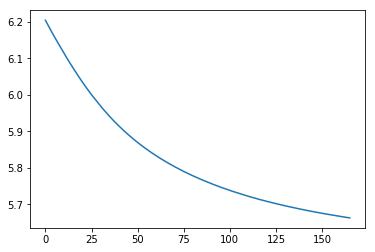

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(progress['train']['mlogloss'])

In [20]:
import pickle
# save the classifier
with open('xgb_classifier_165_rounds_500_prods.pkl', 'wb') as fid:
    pickle.dump(clf, fid) 

In [21]:
sample = pd.read_csv('sampleSubmission.csv')

In [22]:
colsdrop = ['target']
df_recent = df.drop(colsdrop, axis=1)

In [23]:
df_recent.head()

,1000001696.0,1000005980.0,1000010393.0,1000010403.0,1000010411.0,1000017733.0,1000019395.0,1000019459.0,1000019571.0,1000026628.0,1000026742.0,1000026751.0,1000032404.0,1000034055.0,1000034447.0,1000049681.0,1000052897.0,1000053898.0,1000058092.0,1000059431.0,1000067672.0,1000067678.0,1000071425.0,1000081523.0,1000088419.0,1000088467.0,1000088473.0,1000088477.0,1000088500.0,1000088540.0,1000092917.0,1000093979.0,1000096658.0,1000096680.0,1000110589.0,1000110676.0,1000116549.0,1000123958.0,1000129487.0,1000129541.0,1000158186.0,1000171548.0,1000209934.0,1000215039.0,1000269704.0,1000327894.0,1000334998.0,1000336252.0,1000349544.0,1000443242.0,1000450352.0,1000475623.0,1000486459.0,1000486566.0,1000503970.0,1000577194.0,1000591805.0,1000609658.0,1000615919.0,1000619267.0,1000619269.0,1000638372.0,1000652689.0,1000652761.0,1000694851.0,100105102.0,100105505.0,108000534.0,108000537.0,108000544.0,108000549.0,108000568.0,108000569.0,108000571.0,108000589.0,108000590.0,108000599.0,108000614.0,108000621.0,108000628.0,108000643.0,108000653.0,108000655.0,108000656.0,108000659.0,108000667.0,108000678.0,108000704.0,108000705.0,108000706.0,108000707.0,108000763.0,108000764.0,108000770.0,108000943.0,108000959.0,108000969.0,108000980.0,108000982.0,108001038.0,108001065.0,108001066.0,108001109.0,108001125.0,108001127.0,108001129.0,108001153.0,108001161.0,108001163.0,108001179.0,108001180.0,108001187.0,108001189.0,108001199.0,108003214.0,108003216.0,108003448.0,108003451.0,108003545.0,108003587.0,108003624.0,108003638.0,108003897.0,108004055.0,108004100.0,108004398.0,108004399.0,108004423.0,108004507.0,108004511.0,108004516.0,108004526.0,108004528.0,108004590.0,108004622.0,108004629.0,108004632.0,108004633.0,108004634.0,108004880.0,108004975.0,108004977.0,108005183.0,108005676.0,108005681.0,108005943.0,108007928.0,108008225.0,108008866.0,108010225.0,108014204.0,108014207.0,108014459.0,108015124.0,108015125.0,108015133.0,108015135.0,108015369.0,108015910.0,108016183.0,108016185.0,108016186.0,108016189.0,108016191.0,108016194.0,108017242.0,108017243.0,108017244.0,108017245.0,108017697.0,108018305.0,108018314.0,108018729.0,108018730.0,108018749.0,108018750.0,108018925.0,108020340.0,108020344.0,108020365.0,108020370.0,108020371.0,108020392.0,108020412.0,108020413.0,108020414.0,108020415.0,108020416.0,108020417.0,108020418.0,108020419.0,108020428.0,108020429.0,108020460.0,108020461.0,108020474.0,108020477.0,108020515.0,108020516.0,108020517.0,108020526.0,108020545.0,108020718.0,108022599.0,108026386.0,108026387.0,108026389.0,108026485.0,108026493.0,108026497.0,108026801.0,108027348.0,108027409.0,108027464.0,108028269.0,108028801.0,108029256.0,108029299.0,108029618.0,108029656.0,108029660.0,108030063.0,108030064.0,108030066.0,108030093.0,108030095.0,108030108.0,108030113.0,108032048.0,108032050.0,108032051.0,108032209.0,108034290.0,108034674.0,108035036.0,108035037.0,108035243.0,108035244.0,108037470.0,108037471.0,108037489.0,108037490.0,108037495.0,108037497.0,108037499.0,108037500.0,108037501.0,108037502.0,108037504.0,108037506.0,108037518.0,108037534.0,108037537.0,108037568.0,108037578.0,108037703.0,108037794.0,108037803.0,108037817.0,108042082.0,108043219.0,108043278.0,108100059.0,108100064.0,108100134.0,108100137.0,108100143.0,108100145.0,108100154.0,108100162.0,108100183.0,108100193.0,108100201.0,108100213.0,108100218.0,108100221.0,108100225.0,108100226.0,108100243.0,108100250.0,108100253.0,108100258.0,108100261.0,108100267.0,108100272.0,108100273.0,108100275.0,108100276.0,108100277.0,108100278.0,108100280.0,108100288.0,108100290.0,108100294.0,108100296.0,108100297.0,108100298.0,108100299.0,108100301.0,108100302.0,108100306.0,108100308.0,108100312.0,108100319.0,108100325.0,108100328.0,108100330.0,108100331.0,108100334.0,108100335.0,108100336.0,108100340.0,108100352.0,108100355.0,108100361.0,108100362.0,108100364.0,108100373.0,108100375.0,108100379.0,108100382.0,208001941.0,208002292.0,300027193.0,300028156.0,300035666.0,300043603.0,300054859.

In [24]:
already_active = {}
for row in df_recent.values:
    row = list(row)
    id = row.pop(-1)
    active = [c[0] for c in zip(df_recent.columns[1:], row) if c[1] > 0]
    already_active[id] = active

In [25]:
test_preds = {}
for id, p in id_preds.items():
    preds = [i[0] for i in sorted([i for i in zip(df_recent.columns[1:], p) if i[0] not in already_active[id]], key=lambda i:i [1], reverse=True)[:20]]
    test_preds[id] = preds



In [26]:
users = df_recent['customerID'].tolist()

u = {}
for i in range(len(users)):
    u[users[i]] = i


In [27]:
pred = []
testusers = sample['customerID'].tolist()

n = 20
for user in testusers[:]:
    if user not in u:
        pred.append("300776411,300776410,108037568,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None")
        sample['products'] = pd.Series(pred)
    elif user not in test_preds.keys():
        pred.append("300776411,300776410,108037568,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None")
        sample['products'] = pd.Series(pred)        
    else:
        id = user
        p = test_preds[id]
        pred.append(",".join(p))
        if len(pred) < 20:
            print('if block')
            pred.append("None," * (20 - len(pred)))
#print(len(pred))

sample['products'] = pd.Series(pred)
#test['products'] = pred
#test.to_csv('sub_new_k8_12.csv', index=False)


In [28]:
sample.to_csv('xgb_165rounds_new_500_prods.csv', index=False)

In [ ]:
df_train.head()

In [ ]:
product_col_5 = [col for col in df_train.columns if '.0_5' in col]
product_col_4 = [col for col in df_train.columns if '.0_4' in col]
product_col_3 = [col for col in df_train.columns if '.0_3' in col]
product_col_2 = [col for col in df_train.columns if '.0_2' in col]
product_col_1 = [col for col in df_train.columns if '.0_1' in col]


col1 = product_col_1 + product_col_2 + product_col_3 + product_col_4 + product_col_5
col2 = list(df_train.drop(['target','customerID']+col1, 1).columns.values)

x_train1 = df_train[col1].as_matrix()
x_test1 = df_test[col1].as_matrix()

x_train1 = np.reshape(x_train1, (len(x_train1), 5, 100))
x_test1 = np.reshape(x_test1, (len(x_test1), 5, 100))

x_train2 = df_train[col2].as_matrix()
x_test2 = df_test[col2].as_matrix()

y_train = pd.get_dummies(df_train['target'].astype(int)).as_matrix()

In [ ]:
id_preds1 = defaultdict(list)
ids = df_test['customerID'].values
  
### product-wise
model1 = Sequential()
model1.add(Convolution1D(60, 100, border_mode='same', input_shape=(5, 100),activation = 'relu'))
model1.add(Flatten())

# time-wise
model2 = Sequential()
model2.add(Convolution1D(30, 5, border_mode='same', input_shape=(100, 5),activation = 'relu'))
model2.add(Flatten())

# domegraphic-wise
model3 = Sequential()
model3.add(Dense(150, input_dim=len(col2), init='uniform', activation='relu'))

merged = Merge([model1,model2,model3], mode='concat')

final_model = Sequential()
final_model.add(merged)
final_model.add(Dense(40, init='uniform', activation='softmax'))
final_model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['categorical_accuracy'])
print(final_model.summary())

history = final_model.fit([x_train1, x_train1.transpose((0, 2, 1)), x_train2], y_train, nb_epoch=100, batch_size=100, verbose = 2)
        
p_test = final_model.predict([x_test1, x_test1.transpose((0, 2, 1)), x_test2])
        
for id, p in zip(ids, p_test):
    #id_preds[id] = list(p)
    id_preds1[id] = list(p)

In [ ]:
product_list = df_test[product_col_5].sum(axis=0)/(df_test[product_col_5].sum(axis=0).sum())

id_preds5 = {}
for row in df_test.values:
    id = row[0]
    id_preds5[id] = list(product_list)

In [ ]:
fractionKeras = 0.3
fractionXGB = 0.7
fractionRanking = 0.1
id_preds_combined = {}

for uid, p in id_preds1.items():
    id_preds_combined[uid] = fractionKeras*np.asarray(id_preds1[uid]) + fractionXGB*np.asarray(id_preds[uid]) + fractionRanking*np.asarray(id_preds5[uid])
    
id_preds = id_preds_combined